In [32]:
from emcee.backends import HDFBackend
import matplotlib.pyplot as plt
import numpy as np
from curve_fit_v2 import get_data

In [33]:
from lenstronomy.Cosmo.micro_lensing import einstein_radius
import astropy.units as u
from scipy.interpolate import RegularGridInterpolator

with open('ellip_table_tu.npy', 'rb') as f:
    theta_E0 = np.load(f)
    u0 = np.load(f)
    table = np.load(f)
interpolator = RegularGridInterpolator((u0, theta_E0), table, bounds_error=False, fill_value=None)

pc2km = u.pc.to(u.km)
sec2day = u.s.to(u.day)
arcsec2rad = u.arcsec.to(u.rad)

def get_data(t, t0, M, v, d_l, d_s, u_min):
    """
    get curve at a given parameter.
    unit:
        t, t0: day
        M: M_sol,
        v: km/s,
        d_l, d_s: pc
    """
    theta_E = einstein_radius(M, d_l, d_s)
    t_E = theta_E*arcsec2rad*d_l*pc2km/v*sec2day
    u = np.sqrt(u_min*u_min + ((t-t0)/t_E)**2)
    new_x = np.stack((u, np.ones_like(u)*theta_E), axis=-1)
    y = interpolator(new_x)
    print(u)
    return y

In [2]:
t_obs, e_obs, err_obs = np.load('mock2.npy')

In [7]:
t_obs

array([-390.68526847, -349.56050336, -308.43573826, -267.31097316,
       -226.18620806, -185.06144296, -143.93667786, -102.81191275,
        -61.68714765,  -20.56238255,   20.56238255,   61.68714765,
        102.81191275,  143.93667786,  185.06144296,  226.18620806,
        267.31097316,  308.43573826,  349.56050336,  390.68526847])

In [30]:
get_data(t_obs, 0.0, 288.6104049337564, 462.81707650997345, 4000.0, 8000.0, 0.2)

[1.53600106 1.37721615 1.21883002 1.06102127 0.90409228 0.74859654
 0.59565756 0.4479021  0.31276487 0.21546381 0.21546381 0.31276487
 0.4479021  0.59565756 0.74859654 0.90409228 1.06102127 1.21883002
 1.37721615 1.53600106]


array([0.11761067, 0.11765344, 0.11767173, 0.11768387, 0.1176904 ,
       0.1176941 , 0.11771604, 0.1177164 , 0.11771568, 0.11770736,
       0.11770736, 0.11771568, 0.1177164 , 0.11771604, 0.1176941 ,
       0.1176904 , 0.11768387, 0.11767173, 0.11765344, 0.11761067])

[1.0198039  0.91681733 0.8144131  0.71284223 0.61251943 0.51417578
 0.41920648 0.33053302 0.25481512 0.20680929 0.20680929 0.25481512
 0.33053302 0.41920648 0.51417578 0.61251943 0.71284223 0.8144131
 0.91681733 1.0198039 ]


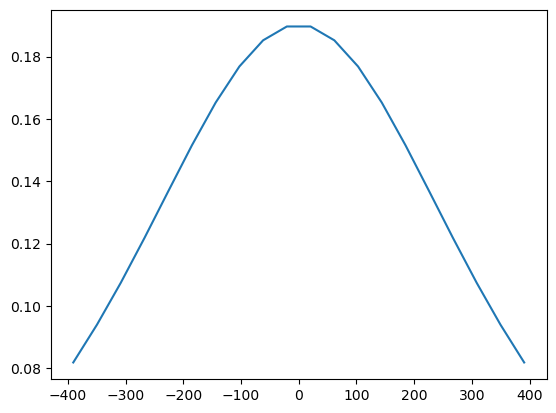

In [34]:
plt.plot(t_obs, get_data(t_obs, 0, 500, 400, 4000, 8000, 0.2))